<a href="https://colab.research.google.com/github/gmehra123/data_science_projs/blob/main/Code_along_Visualization_and_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Basic Functions (When to use)
* When you use certain sections of code repeatedly with changes in a few parameters we use functions.
* If the code is run repeatedly with the same static parameters no need to write functions
* Write functions in the most generalizable way possible.
* Functions generally take parameters, operate/use those parameters and return a value or in the case of functions used for visualizations output to a file.
*One way functions are used is to create standard visualizations (with titles, axis labels, fonts, style types etc). You define these once in a function and you can call that function repoaetedly with different datasets and columns to generate the standard visualization
  * All functions begin with the **def** keyword
  * **def** is followed by the funnction name and parantheses.
  * Inside the parantheis you include the parameters the function needs.
  >for eg. def  add_own(a,b) where a and b are the numbers to be added.



In [40]:
# A simple addition function
def add_own (a,b):
  c = a+b
  return(c)

In [41]:
# Using user defined add_own function
z=30
n =40
print("first call to add ",add_own(z,n))
print("second call to add ",add_own(50,-70))

first call to add  70
second call to add  -20


In [42]:
# building an pv function
def PV_calc(FV,nper,rate):
  PV = FV/(1+rate)**nper
  return(PV)

In [58]:
print("First call to PV function",PV_calc(7000,1,0.04))
print("second call to PV function ",PV_calc(9000,2,0.04))
print("third call to PV function",PV_calc(12000,3,0.04))

First call to PV function 6730.7692307692305
second call to PV function  8321.005917159762
third call to PV function 10667.956304050978


In [6]:
# Now calling PV using user input
try:
  FV = input("Please enter FV ")
  FV = float(FV)
  nper = input("Please enter the number of periods ")
  nper = int(nper)
  rate = input("Please enbter the rate ")
  rate = float(rate)
  PV_res = PV_calc(FV,nper,rate)
  print("PV is ", PV_res)
except:
  print("Enter numbers only")

Please enter FV 10000
Please enter the number of periods 10
Please enbter the rate 0.05
PV is  6139.132535407592


In [63]:
# Now creating an NPV function
def NPV(CF_array,rate):
  i = 0
  NPV = 0
  for CF in CF_array:
    PV = PV_calc(CF,i,rate)
    #print(PV)
    NPV = NPV + PV
    i = i + 1
  return(NPV)

In [64]:
CF_array = [-10000,7000,9000,12000]
NPV(CF_array,rate=0.04)

15719.731451979971

### Reading in data and cleaning

In [10]:
bnb = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Airbnb_Open_Data.csv")

<ipython-input-10-5d2c9aeeeeef>:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  bnb = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Airbnb_Open_Data.csv")


In [11]:
bnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [12]:
bnb.price.unique()

array(['$966 ', '$142 ', '$620 ', ..., '$1,184 ', '$905 ', '$309 '],
      dtype=object)

In [13]:
 bnb['price']= bnb.price.str.split('$',expand=True).loc[:,1]

In [14]:
bnb['price'] = bnb['price'].str.replace(",","")

In [15]:
bnb['price'] = bnb['price'].astype('float')

### Visulaizing a scatter plot without functions
* First scatterplot is built using out of the box matplotlib without titles and axis labels
* Second scatterplot is built with titles and axis labels.
* Third scatter plot is the standardized scttarplot.
* After this we run the a generalized version wrapped inside a function so we avoid copy pasting multiple times

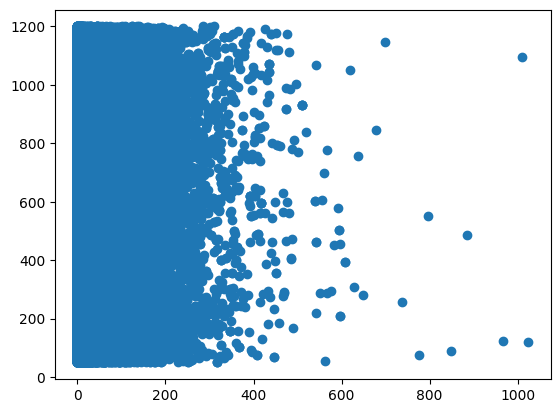

In [16]:
# Out of the box no title no label
fig,ax = plt.subplots()
ax.scatter(x = bnb['number of reviews'], y = bnb["price"])

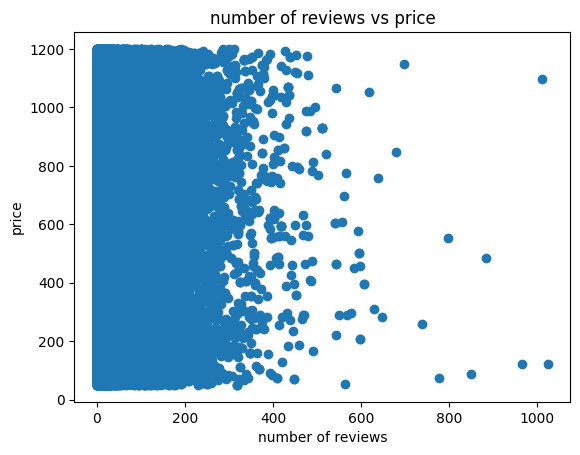

In [17]:
# Title and label included
fig,ax = plt.subplots()
ax.set_title("number of reviews vs price")
ax.set_xlabel("number of reviews")
ax.set_ylabel("price")
ax.scatter(x = bnb['number of reviews'], y = bnb["price"])

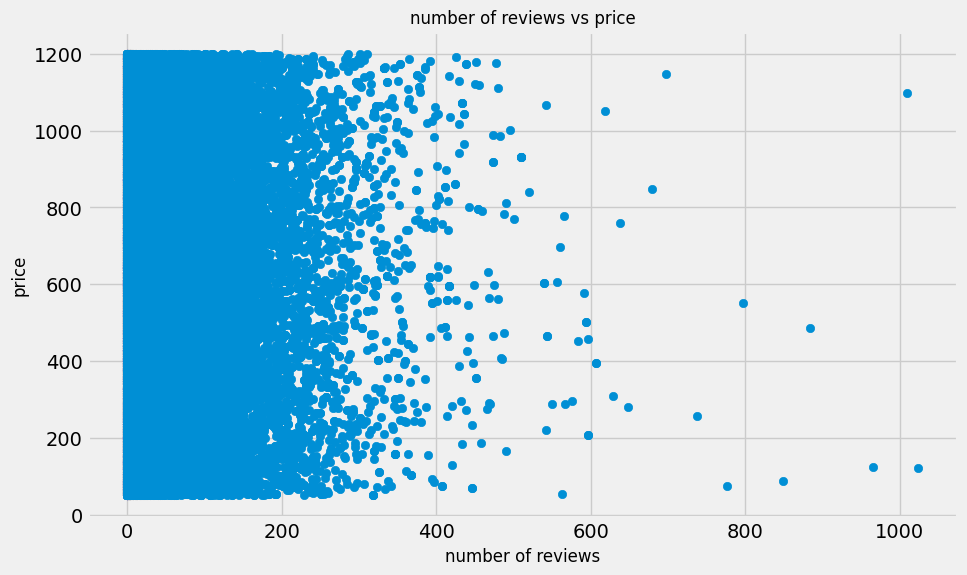

In [18]:
# Implementation of formatted data visualization without functions
plt.style.use("fivethirtyeight")
fig,ax = plt.subplots(figsize=(10,6))
font1 = {"family":"sans-serif","size":12}
font2 = {"family": "sans-serif","size":12}
font3 ={"family":"sans-serif","size":10}
ax.scatter(x = bnb['number of reviews'], y = bnb["price"])
ax.set_xlabel("number of reviews", fontdict = font1)
# Setting the x_ticklabels to the correct fontname
for tick in ax.get_xticklabels():
    tick.set_fontname("sans-serif")
ax.set_ylabel("price",fontdict = font2)
# setting the y_tick labels to correct font name
for tick in ax.get_yticklabels():
    tick.set_fontname("sans-serif")
ax.set_title("number of reviews vs price",fontdict = font1)
plt.show()

### Using functions to recreate the standard scatter plot
* This function can be used across different datasets and with different sets of columns
* This would be an appropriate use for writing a function

In [37]:
def scatter_plot_vistra(df, colx, coly, size=(10,6)):
  plt.style.use('fivethirtyeight')
  fig,ax = plt.subplots(figsize = size)
  font1 = {"family":"sans-serif","size":12}
  font2 = {"family": "sans-serif","size":12}
  font3 ={"family":"sans-serif","size":10}
  ax.scatter(x = df[colx], y = df[coly])
  ax.set_xlabel(f"{colx}", fontdict = font1)
  ax.set_ylabel(f"{coly}", fontdict = font2)
  # Setting the x_ticklabels to the correct fontname
  for tick in ax.get_xticklabels():
    tick.set_fontname("sans-serif")
  ax.set_ylabel("price",fontdict = font2)
  # setting the y_tick labels to correct font name
  for tick in ax.get_yticklabels():
    tick.set_fontname("sans-serif")
  ax.set_title(f"{colx} vs {coly}",fontdict = font1)
  plt.savefig(f'{colx} vs {coly}.jpeg')




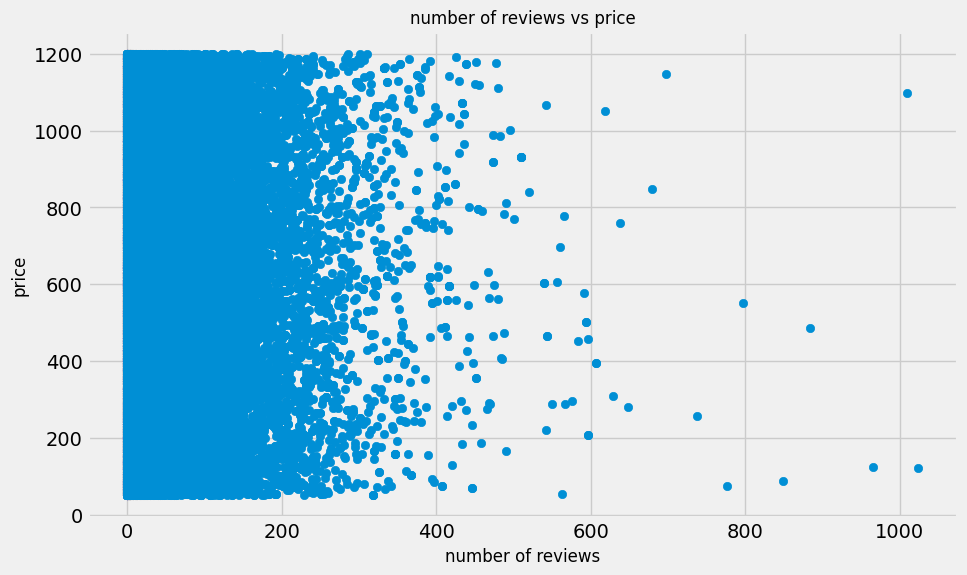

In [38]:
scatter_plot_vistra(bnb, colx = "number of reviews", coly = "price", size = (10,6))

In [35]:
cai = pd.read_csv("/content/sample_data/california_housing_test.csv")

In [36]:
cai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   float64
 3   total_rooms         3000 non-null   float64
 4   total_bedrooms      3000 non-null   float64
 5   population          3000 non-null   float64
 6   households          3000 non-null   float64
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   float64
dtypes: float64(9)
memory usage: 211.1 KB


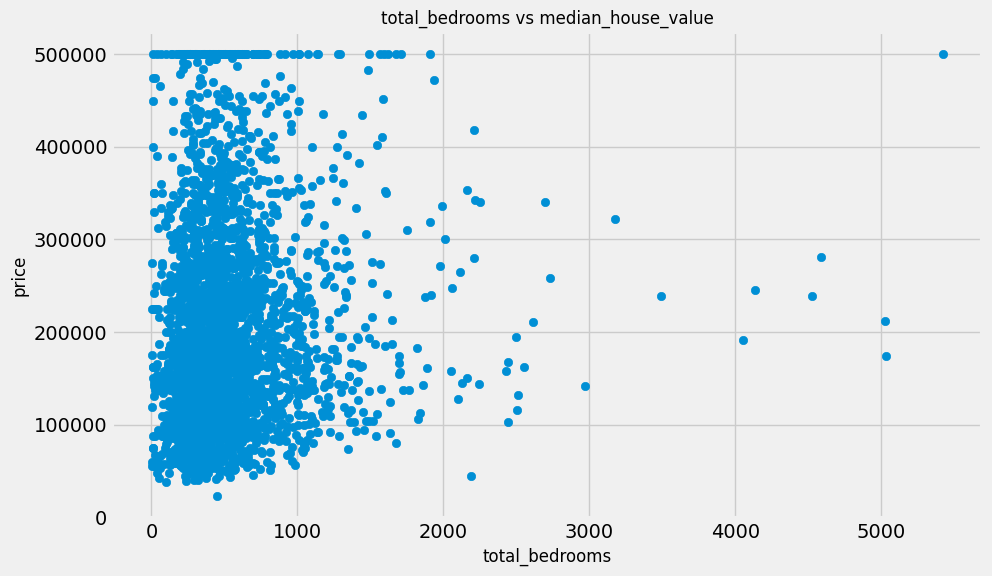

In [39]:
scatter_plot_vistra(cai, colx = "total_bedrooms", coly = "median_house_value", size = (10,6))